# Cluster analysis  US Universities and Colleges

# Contents <a id='back'></a>

* [1. Introduction](#intro)
    * [1.1 Objective](#objective)
* [2. Initialisation](#init)
* [3. Data Exploration and Data Preprocessing](#data_exploration)
* [4. Exploratory Data Analysis (EDA)](#eda)
    * [4.1 Distribution of Public and Private Universities/Colleges](#public_private)
    * [4.2 Distributions of Popularity Features](#popularity_eda)
    * [4.3 Distributions of Quality Features](#quality_eda)
    * [4.4 Distributions of Cost Features](#cost_eda)
* [5. Cluster Analysis](#cluster)
    * [5.1 Popularity](#popularity)
    * [5.2 Quality](#quality)
    * [5.3 Cost](#cost)
* [6. Conclusion](#conclusion)

## 1. Introduction <a id='intro'></a>

With thousands of uniservisities and colleges spread across the US, each with its own unique blend of programs and resources, categorising and understanding these institutions can be a challenging task. The insights gained through the cluster analysis of these colleges can be beneficial for students and families in the college selection process.

## 1.1 Objective <a id='objective'></a>

This project aims to identifies the similarity and differences among the US colleges from different perspective.

[Back to Contents](#back)

## 2. Initialisation <a id='init'></a>

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

[Back to Contents](#back)

## 3. Data Exploration and Preprocessing <a id='data_exploration'></a>

In [2]:
# Load the dataset
df = pd.read_csv('College.csv')

In [3]:
# Check the first five rows
df.head(5)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
# Check the shape
df.shape

(777, 19)

The datasets contains of 777 rows (college) with 19 columns of relevant information for each college.

**Description of data**

- Unnamed: 0: The college name
- Private: A factor with levels No and Yes indicating private or public university
- Apps: Number of applications received
- Accept: Number of applications accepted
- Enroll: Number of new students enrolled
- Top10perc: Percentage of new students from top 10% of H.S. class
- Top25perc: Percentage of new students from top 25% of H.S. class
- F.Undergrad: Number of fulltime undergraduates
- P.Undergrad: Number of parttime undergraduates
- Outstate: Out-of-state tuition
- Room.Board: Room and board costs
- Books: Estimated book costs
- Personal: Estimated personal spending
- PhD: Pct. of faculty with Ph.D.’s
- Terminal: Pct. of faculty with terminal degree
- S.F.Ratio: Student/faculty ratio
- perc.alumni: Pct. alumni who donate
- Expend: Instructional expenditure per student
- Grad.Rate: Graduation rate

**Issue and Solution**

1. The `Unnamed: 0` column will be renamed to college_name.
2. All The column names will be converted into snake case.

In [5]:
# Fix `Unnamed: 0` and convert columns name into snake case
df.columns = [x.lower() for x in df.columns]
df.rename(columns={
    'unnamed: 0': 'college_name',
    'f.undergrad': 'f_undergrad',
    'p.undergrad': 'p_undergrad',
    'room.board': 'room_board',
    's.f.ratio': 'sf_ratio',
    'perc.alumni': 'perc_alumni',
    'grad.rate': 'grad_rate'
}, inplace=True)

# Check the column names
df.columns

Index(['college_name', 'private', 'apps', 'accept', 'enroll', 'top10perc',
       'top25perc', 'f_undergrad', 'p_undergrad', 'outstate', 'room_board',
       'books', 'personal', 'phd', 'terminal', 'sf_ratio', 'perc_alumni',
       'expend', 'grad_rate'],
      dtype='object')

In [6]:
# Check for missing values
df.isna().sum()

college_name    0
private         0
apps            0
accept          0
enroll          0
top10perc       0
top25perc       0
f_undergrad     0
p_undergrad     0
outstate        0
room_board      0
books           0
personal        0
phd             0
terminal        0
sf_ratio        0
perc_alumni     0
expend          0
grad_rate       0
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
# Check the data types
df.dtypes

college_name     object
private          object
apps              int64
accept            int64
enroll            int64
top10perc         int64
top25perc         int64
f_undergrad       int64
p_undergrad       int64
outstate          int64
room_board        int64
books             int64
personal          int64
phd               int64
terminal          int64
sf_ratio        float64
perc_alumni       int64
expend            int64
grad_rate         int64
dtype: object

There is no missing value or duplicate. All the data types are also correct.

[Back to Contents](#back)

## 4. Exploratory Data Analysis (EDA) <a id='eda'></a>

### 4.1 Distribution of Public and Private Universities/Colleges <a id='public_private'></a>

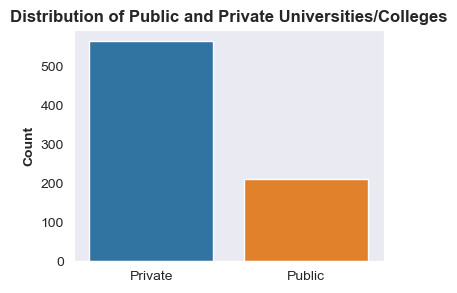

In [9]:
# Plot the barchart to show the distribution
sns.set_style('dark')
plt.figure(figsize=(4, 3))

sns.countplot(data=df, x='private', hue='private')
plt.title('Distribution of Public and Private Universities/Colleges', fontsize=12, fontweight='bold')

plt.xlabel('')
plt.ylabel('Count', fontweight='bold')
plt.xticks([0, 1], ['Private', 'Public'])

plt.show()

The number of private universities/colleges in the dataset is at least twice that of public universities/colleges.

[Back to Contents](#back)

## 4.2 Distributions of Popularity Features <a id='popularity_eda'></a>

In [10]:
# Create the accept ratio and enroll ratio features
df['accept_ratio'] = df['accept'] / df['apps']
df['enroll_ratio'] = df['enroll'] / df['accept']

# Have a look at the newly created features
df[['apps', 'accept', 'enroll', 'accept_ratio', 'enroll_ratio']].head()

,apps,accept,enroll,accept_ratio,enroll_ratio
0,1660,1232,721,0.742169,0.585227
1,2186,1924,512,0.880146,0.266112
2,1428,1097,336,0.768207,0.306290
3,417,349,137,0.836930,0.392550
4,193,146,55,0.756477,0.376712


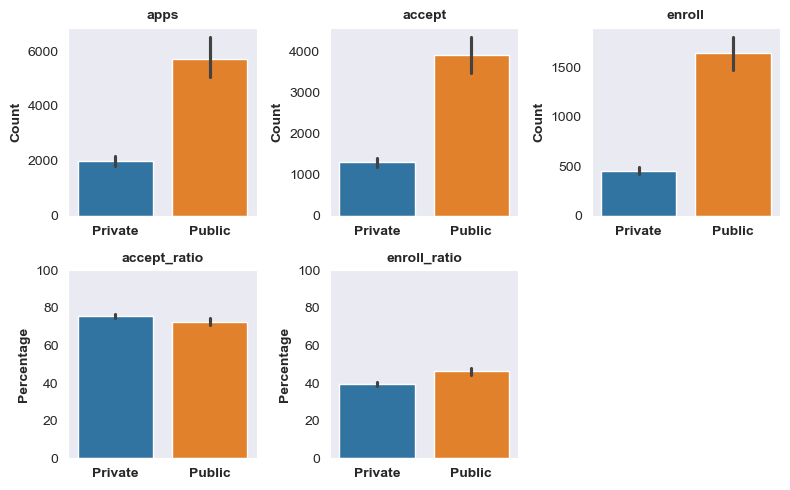

In [11]:
# Get the list of popularity features
popularity_features = ['apps', 'accept', 'enroll', 'accept_ratio', 'enroll_ratio']

# Plot the bar charts to show the distribution of each feature
nrows, ncols = 2, 3
features = popularity_features

sns.set_style('dark')
fig, axs = plt.subplots(nrows, ncols, figsize=(8, 5))

for i in range(nrows):
    for j in range(ncols):
        idx = i*ncols + j
        if idx < len(features):
            feature = features[idx]

            ax = axs[i][j]
            sns.barplot(data=df, x='private', y=feature, hue='private', ax=ax)
            ax.set_title(feature, fontsize=10, fontweight='bold')
            ax.set_xlabel('')            
            ax.set_xticks([0, 1], ['Private', 'Public'], fontweight='bold')
            if i == 0:
                ax.set_ylabel('Count', fontweight='bold')
            else:
                ax.set_ylabel('Percentage', fontweight='bold')
                ax.set_yticks(np.linspace(0, 1, 6), np.arange(0, 101, 20))
        else:
            ax = axs[i][j]
            ax.axis(False)

plt.tight_layout()
plt.show()

The mean accept ratios are almost the same for both the private and public universities/colleges, but the mean enroll ratio of public universities/colleges is about 10% higher than that of private universities/colleges.

[Back to Contents](#back)

## 4.3 Distributions of Quality Features <a id='quality_eda'></a>

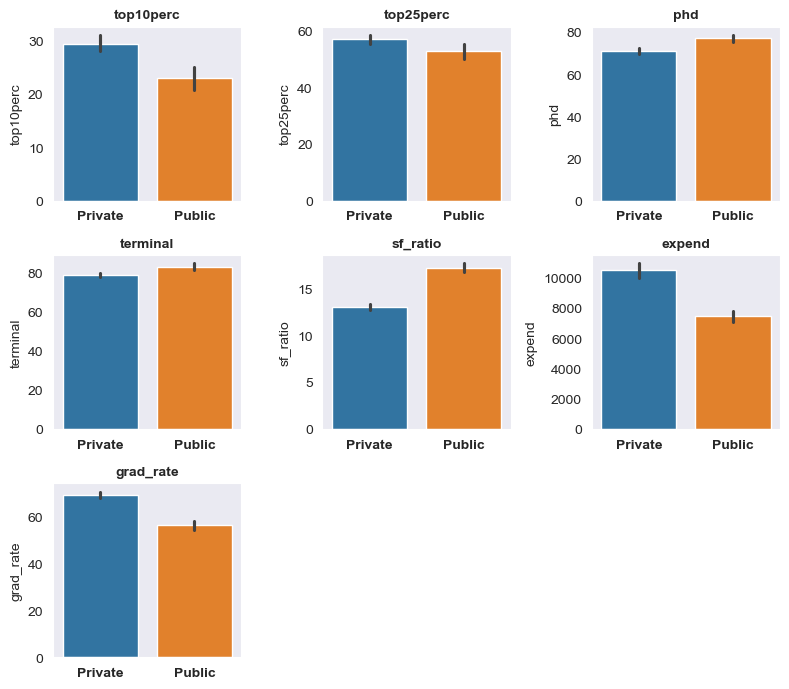

In [12]:
# Get the list of popularity features
quality_features = ['top10perc', 'top25perc', 'phd', 'terminal', 'sf_ratio', 'expend', 'grad_rate']

# Plot the bar charts to show the distribution of each feature
nrows, ncols = 3, 3
features = quality_features

sns.set_style('dark')
fig, axs = plt.subplots(nrows, ncols, figsize=(8, 7))

for i in range(nrows):
    for j in range(ncols):
        idx = i*ncols + j
        if idx < len(features):
            feature = features[idx]

            ax = axs[i][j]
            sns.barplot(data=df, x='private', y=feature, hue='private', ax=ax)
            ax.set_title(feature, fontsize=10, fontweight='bold')
            ax.set_xlabel('')            
            ax.set_xticks([0, 1], ['Private', 'Public'], fontweight='bold')            
        else:
            ax = axs[i][j]
            ax.axis(False)

plt.tight_layout()
plt.show()

The private universities/colleges have better quality in the following aspects:

- top10perc: Percentage of new students from top 10% of H.S. class
- sf_ratio: Student/faculty ratio
- expend: Instructional expenditure per student
- grad_rate: Graduation rate

The differences in other features are negligible.

[Back to Contents](#back)

## 4.4 Distributions of Cost Features <a id='cost_eda'></a>

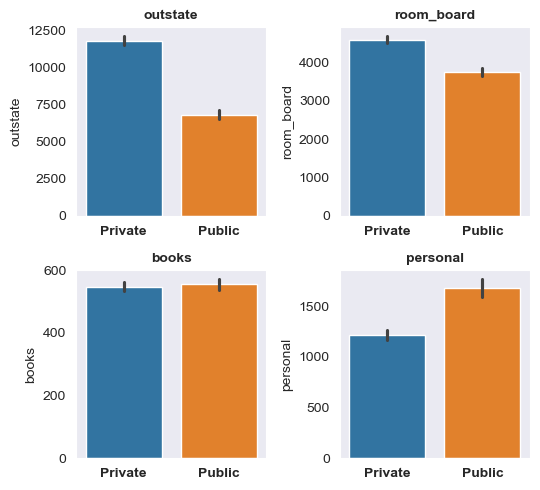

In [13]:
# Get the list of popularity features
cost_features = ['outstate', 'room_board', 'books', 'personal']

# Plot the bar charts to show the distribution of each feature
nrows, ncols = 2, 2
features = cost_features

sns.set_style('dark')
fig, axs = plt.subplots(nrows, ncols, figsize=(5.5, 5))

for i in range(nrows):
    for j in range(ncols):
        idx = i*ncols + j
        if idx < len(features):
            feature = features[idx]

            ax = axs[i][j]
            sns.barplot(data=df, x='private', y=feature, hue='private', ax=ax)
            ax.set_title(feature, fontsize=10, fontweight='bold')
            ax.set_xlabel('')            
            ax.set_xticks([0, 1], ['Private', 'Public'], fontweight='bold')            
        else:
            ax = axs[i][j]
            ax.axis(False)

plt.tight_layout()
plt.show()

The out-of-state tuition fees and room and boards costs are higher for private universities/colleges, while personal spending is higher for public universities/colleges.

[Back to Contents](#back)

## Cluster Analysis <a id='cluster'></a>

### 5.1 Popularity <a id='popularity'></a>

In [14]:
# Get the popularity features
X_pop = df[['accept_ratio', 'enroll_ratio']]

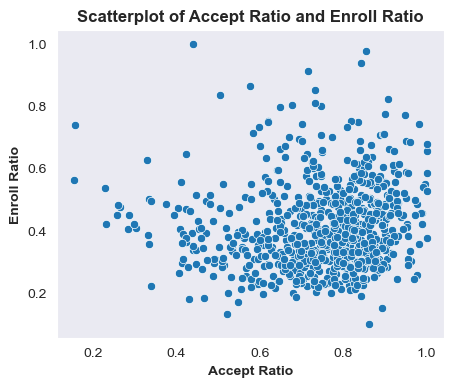

In [15]:
# Plot a scatter plot before clustering
sns.set_style('dark')
plt.figure(figsize=(5, 4))

sns.scatterplot(data=X_pop, x='accept_ratio', y='enroll_ratio')
plt.title('Scatterplot of Accept Ratio and Enroll Ratio', fontsize=12, fontweight='bold')
plt.xlabel('Accept Ratio', fontweight='bold')
plt.ylabel('Enroll Ratio', fontweight='bold')

plt.show()

We will use hierachical clustering to perform the cluster analysis for popularity.

In [16]:
# Feature scaling
sc_pop = StandardScaler()
X_pop_scale = pd.DataFrame(sc_pop.fit_transform(X_pop), columns=X_pop.columns)

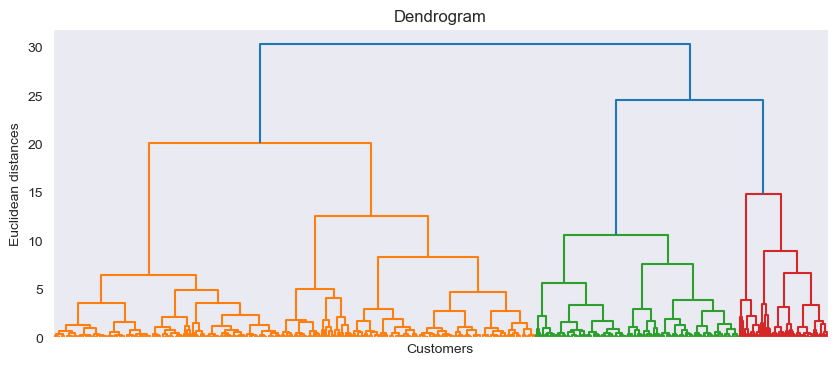

In [17]:
# Plot a dendrogram to find the appropriate number of clusters
plt.figure(figsize=(10 ,4))
dendrogram = sch.dendrogram(sch.linkage(X_pop_scale, method="ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.xticks([])

plt.show()

The optimal number of clusters is 3.

In [18]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_pop_scale)

In [19]:
# Find the average values for each cluster
model_labels = hc_labels
label_name = 'pop_label'
feature_names = list(X_pop.columns)

df[label_name] = model_labels
pop_cls = df[feature_names + [label_name]].groupby(label_name).mean().reset_index()

pop_cls

,pop_label,accept_ratio,enroll_ratio
0,0,0.834475,0.418438
1,1,0.565405,0.603634
2,2,0.618411,0.313178


We will reassign the popularity labels as follows:

- High popularity: The cluster with the highest enroll ratio and lowest accept ratio
- Medium popularity: The cluster with a lower accept ratio from the remaining two
- Low popularity: The last remaining cluster

In [20]:
# Assign the cluster names
label_to_cls = {
    0: 'Low',
    1: 'High',
    2: 'Average'
}

# Rename the labels
pop_cls['pop_label'] = pop_cls['pop_label'].map(label_to_cls)
df['pop_label'] = df['pop_label'].map(label_to_cls)

pop_cls

,pop_label,accept_ratio,enroll_ratio
0,Low,0.834475,0.418438
1,High,0.565405,0.603634
2,Average,0.618411,0.313178


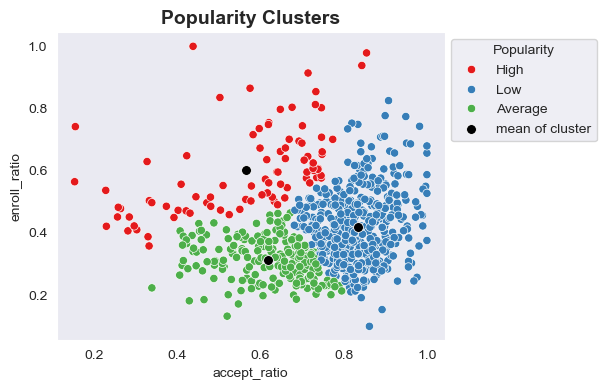

In [21]:
# Plot the scatter plot after clustering
plt.figure(figsize = (5, 4))
sns.scatterplot(data=df, x='accept_ratio', y='enroll_ratio', hue='pop_label', palette='Set1')
plt.title('Popularity Clusters', fontsize=14, fontweight='bold')
sns.scatterplot(data=pop_cls, x='accept_ratio', y='enroll_ratio', color='black', s=50, label='mean of cluster')
plt.legend(title='Popularity', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

The high popularity school are those with high enroll ratios. For the remaining, the universities/college with lower accept ratio is classified as average popularity while the rest are the least popular.

[Back to Contents](#back)

### 5.2 Quality <a id='quality'></a>

In [22]:
# Get the quality features
X_qua = df[['top10perc', 'top25perc', 'phd', 'terminal', 'sf_ratio', 'expend', 'grad_rate']]

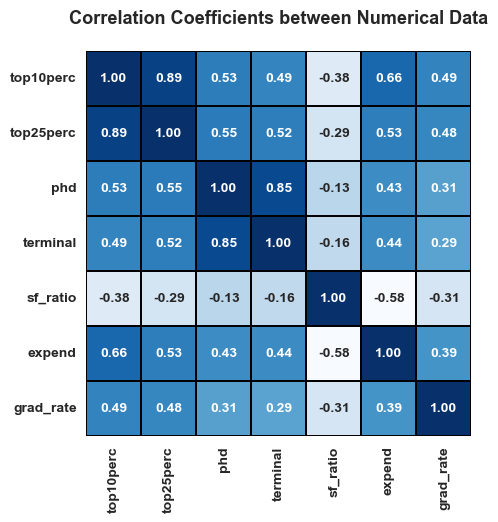

In [23]:
# Heatmap of correlation coefficients
plt.figure(figsize=(5, 5))

sns.heatmap(X_qua.corr(), square=True, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            annot_kws={'size': 10, 'weight': 'bold'}, linewidth=0.1, linecolor='black')

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('Correlation Coefficients between Numerical Data', y=1.05, fontsize=13, fontweight='bold')

plt.show()

There are a lot of highly-correlated features, especially the feature pairs of `top10perc` and `top25perc`, `phd` and `terminal`.

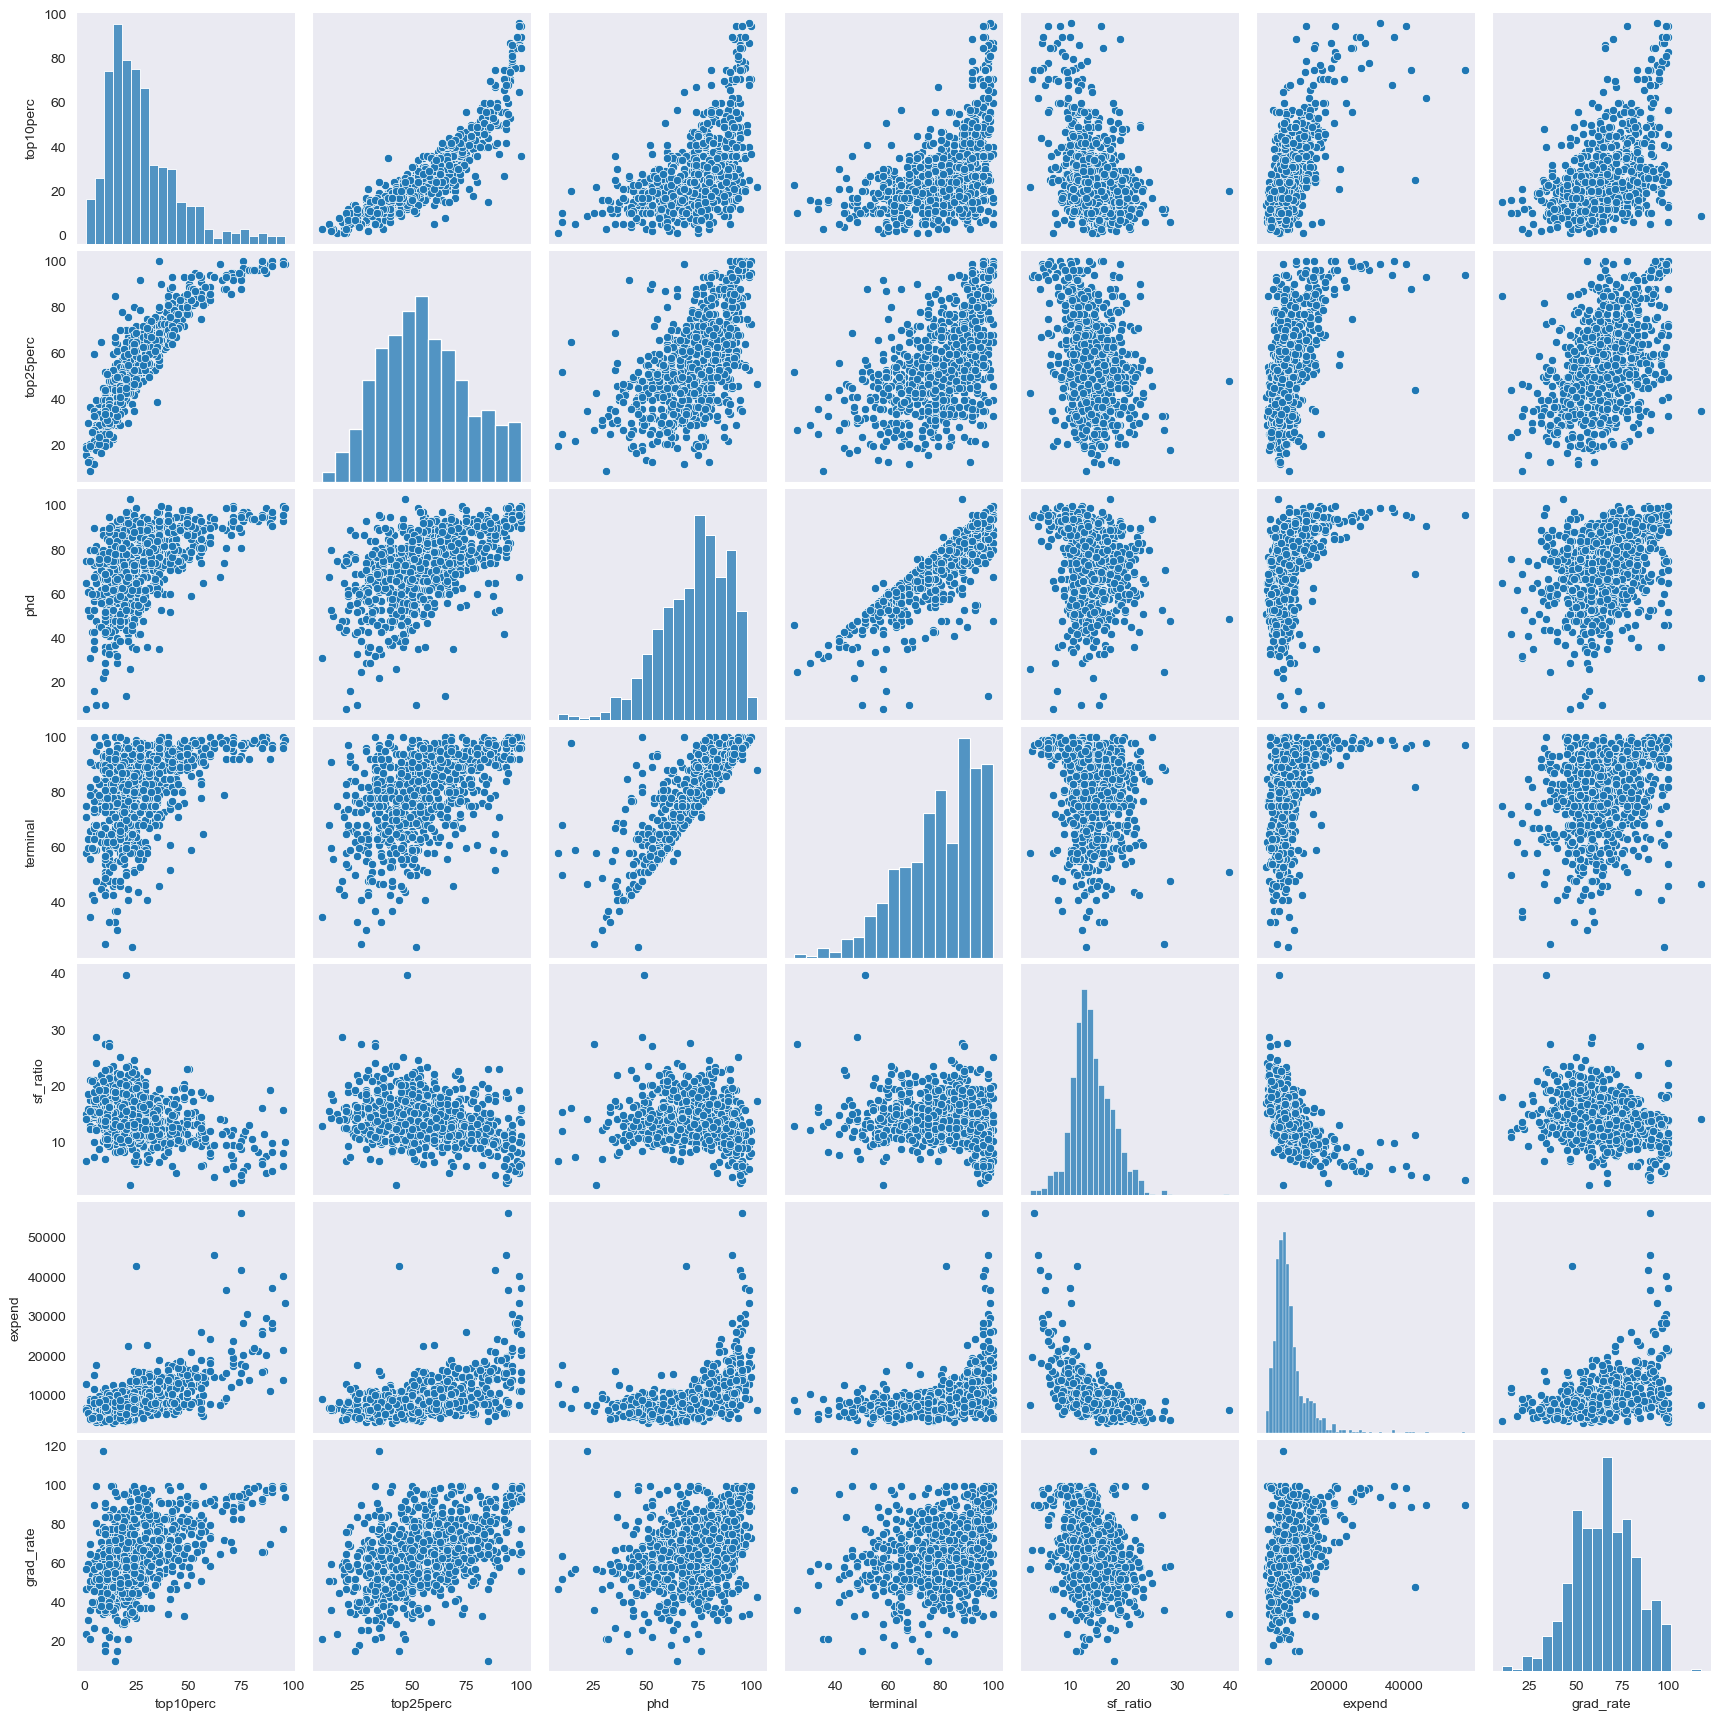

In [24]:
# Plot a pair plot before clustering
sns.pairplot(X_qua);

It is hard to see any pattern, let's try to perform the clustering. Since there are many highly-correlated features, we will perform a principal components analysis first to get some insights.

In [25]:
# Feature scaling
sc_qua = StandardScaler()
X_qua_scale = pd.DataFrame(sc_qua.fit_transform(X_qua), columns=X_qua.columns)

In [26]:
# Check the number of clusters with PCA
for k in range(2, 5):
    pca = PCA(n_components=k)
    pca.fit_transform(X_qua)
    
    # Access the principal components (eigenvectors) from PCA
    components = pca.components_
    
    # Calculate the contribution of each original feature to each principal component
    feature_contributions = pd.DataFrame(
        np.round(np.abs(components.T) / np.sum(np.abs(components.T), axis=0) * 100, 2)
    )    
    feature_contributions.index = X_qua.columns

    # Show the result
    print('Number of principal components:', k)
    display(feature_contributions)
    print()

Number of principal components: 2


,0,1
top10perc,0.22,20.38
top25perc,0.20,27.69
phd,0.13,19.69
terminal,0.12,16.59
sf_ratio,0.04,0.34
expend,99.15,0.17
grad_rate,0.13,15.15



Number of principal components: 3


,0,1,2
top10perc,0.22,20.38,10.76
top25perc,0.20,27.69,11.06
phd,0.13,19.69,26.23
terminal,0.12,16.59,24.15
sf_ratio,0.04,0.34,1.93
expend,99.15,0.17,0.01
grad_rate,0.13,15.15,25.86



Number of principal components: 4


,0,1,2,3
top10perc,0.22,20.38,10.76,17.59
top25perc,0.20,27.69,11.06,22.15
phd,0.13,19.69,26.23,11.11
terminal,0.12,16.59,24.15,10.69
sf_ratio,0.04,0.34,1.93,0.47
expend,99.15,0.17,0.01,0.01
grad_rate,0.13,15.15,25.86,38.00


It is clear that we can generally consider the quality clusters based on two aspects: education level and investment on student. Besides that, `sf_ratio` does not contribute to the clustering analysis and can be dropped.

In [27]:
# Drop sf_ratio
X_qua_scale = X_qua_scale.drop(columns=['sf_ratio'])

In [28]:
# Reduce the number of features to two
pca = PCA(n_components=2)
pca_result = pd.DataFrame(pca.fit_transform(X_qua), columns=['student_investment', 'education_level'])

pca_result.head()

,student_investment,education_level
0,-2619.184853,-1.718655
1,866.611373,64.782202
2,-925.246364,19.922028
3,9355.943387,-12.782030
4,1261.701626,35.148515


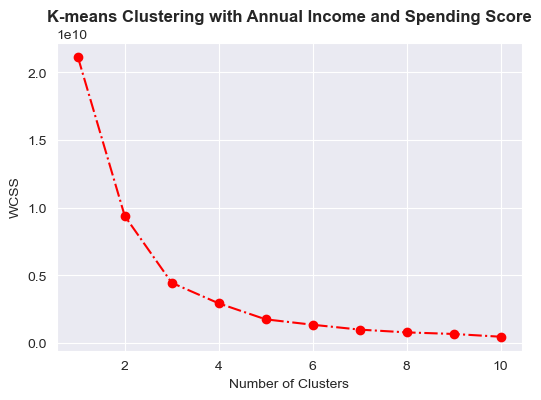

In [29]:
# Find the optimal number of k by using the elbow method (within-cluster sum of square)
wcss = []
for k in range(1, 11):
    kmeans1 = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans1.fit(pca_result)
    wcss.append(kmeans1.inertia_)

sns.set_style('darkgrid')
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering with Annual Income and Spending Score', fontweight='bold')
plt.show()

The within-cluster sum of square value drop sharply before k=5, therefore the optimal number of clusters is 5.

In [30]:
# Create and fit the k-means clustering model
kmeans1 = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans1.fit(pca_result)

KMeans(n_clusters=5, n_init='auto', random_state=42)

In [31]:
# Find the average values for each cluster
model_labels = kmeans1.labels_
label_name = 'qua_label'
feature_names = list(X_qua_scale.columns)

df[label_name] = model_labels
pca_result[label_name] = model_labels
qua_cls = df[feature_names + [label_name]].groupby(label_name).mean().reset_index()

qua_cls

,qua_label,top10perc,top25perc,phd,terminal,expend,grad_rate
0,0,19.028490,46.868946,65.575499,72.891738,6429.376068,58.868946
1,1,72.454545,90.909091,93.000000,96.909091,23880.500000,89.681818
2,2,73.250000,88.875000,92.750000,95.625000,41828.375000,87.500000
3,3,43.490566,73.075472,85.396226,91.830189,14998.386792,73.905660
4,4,27.393103,56.710345,74.482759,81.768966,9653.155172,67.913793


In [32]:
# Assign the cluster names
label_to_cls = {
    0: 'Below Average',
    1: 'Good',
    2: 'Best',
    3: 'Above Average',
    4: 'Average'
}

# Rename the labels
qua_cls['qua_label'] = qua_cls['qua_label'].map(label_to_cls)
df['qua_label'] = df['qua_label'].map(label_to_cls)
pca_result['qua_label'] = pca_result['qua_label'].map(label_to_cls)

qua_cls

,qua_label,top10perc,top25perc,phd,terminal,expend,grad_rate
0,Below Average,19.028490,46.868946,65.575499,72.891738,6429.376068,58.868946
1,Good,72.454545,90.909091,93.000000,96.909091,23880.500000,89.681818
2,Best,73.250000,88.875000,92.750000,95.625000,41828.375000,87.500000
3,Above Average,43.490566,73.075472,85.396226,91.830189,14998.386792,73.905660
4,Average,27.393103,56.710345,74.482759,81.768966,9653.155172,67.913793


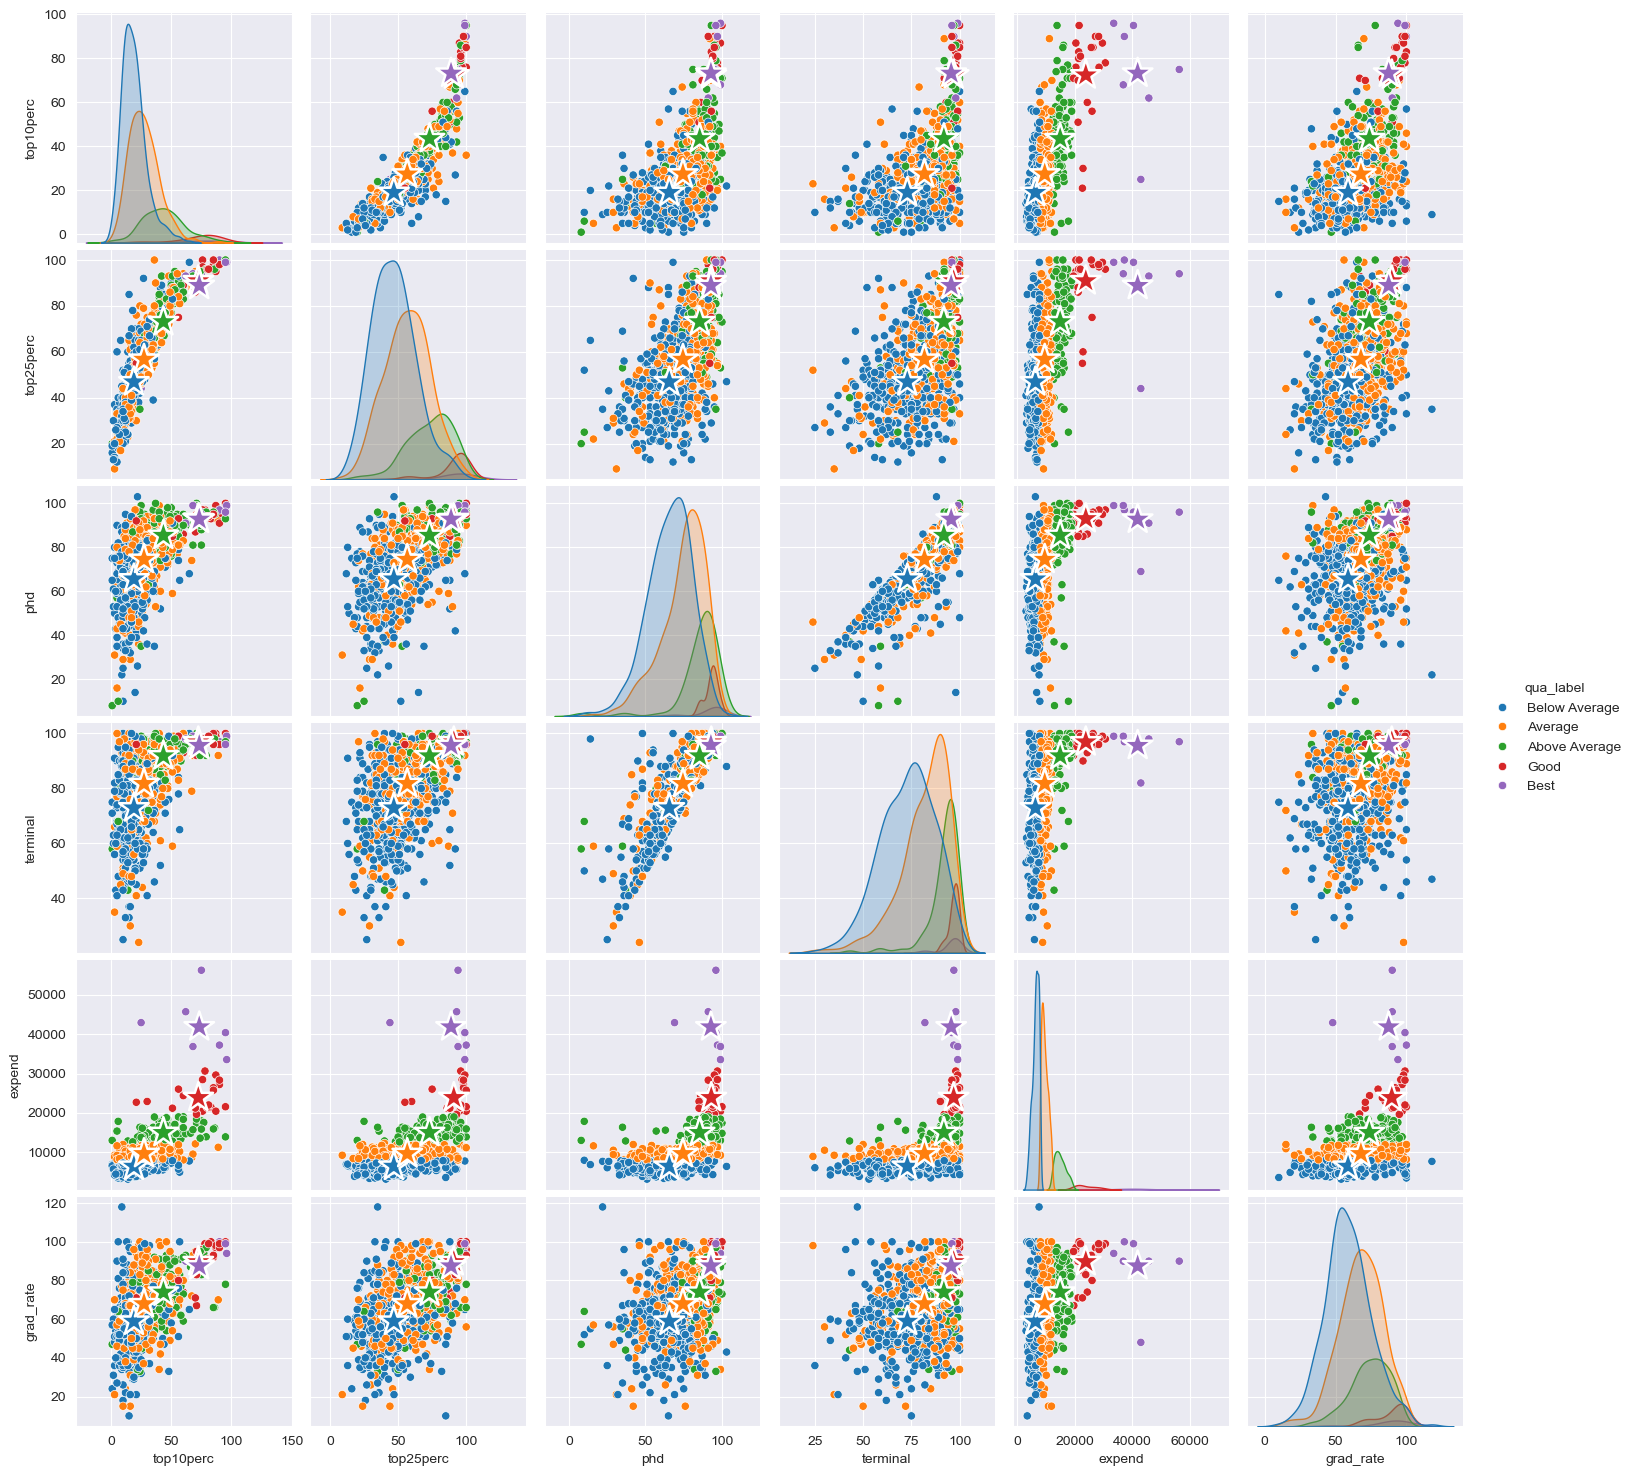

In [33]:
# Plot the pair plot after clustering
pairgrid = sns.pairplot(df[quality_features + ['qua_label']].drop(columns=['sf_ratio']), hue='qua_label')

pairgrid.data = qua_cls
pairgrid.map_offdiag(func=sns.scatterplot, s=500, marker='*', palette='flag');

The `expend` (`investment on student`) is the primary factor to divide the universities/colleges into different quality clusters.

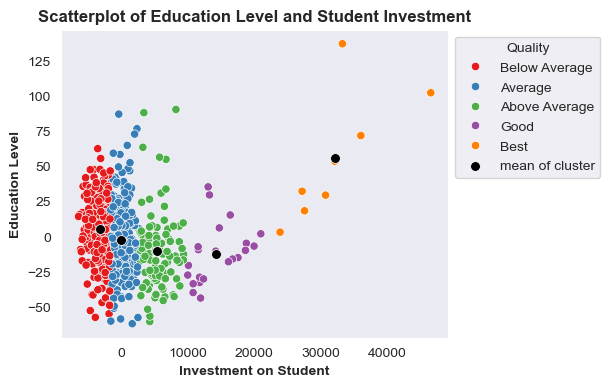

In [34]:
# Plot a scatter plot with education level and student investment features
sns.set_style('dark')
plt.figure(figsize=(5, 4))

sns.scatterplot(data=pca_result, x='student_investment', y='education_level', hue='qua_label', palette='Set1')
plt.title('Scatterplot of Education Level and Student Investment', fontsize=12, fontweight='bold')
plt.xlabel('Investment on Student', fontweight='bold')
plt.ylabel('Education Level', fontweight='bold')
pca_cls = pca_result.groupby('qua_label').mean().reset_index()
sns.scatterplot(data=pca_cls, x='student_investment', y='education_level', color='black', s=50, label='mean of cluster')
plt.legend(title='Quality', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Again, it shows that the `expend` (`investment on student`) is the primary factor to divide the universities/colleges into different quality clusters.

[Back to Contents](#back)

## 5.3 Cost <a id='cost'></a>

In [35]:
# Get the cost features
X_cost = df[['outstate', 'room_board', 'books', 'personal']]

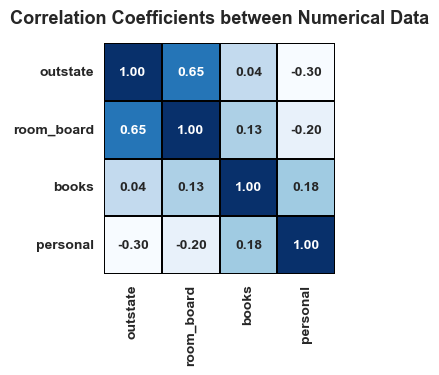

In [36]:
# Heatmap of correlation coefficients
plt.figure(figsize=(3, 3))

sns.heatmap(X_cost.corr(), square=True, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            annot_kws={'size': 10, 'weight': 'bold'}, linewidth=0.1, linecolor='black')

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('Correlation Coefficients between Numerical Data', y=1.05, fontsize=13, fontweight='bold')

plt.show()

It is reasonable that `outstate` has a direct relationship with `room_board`.

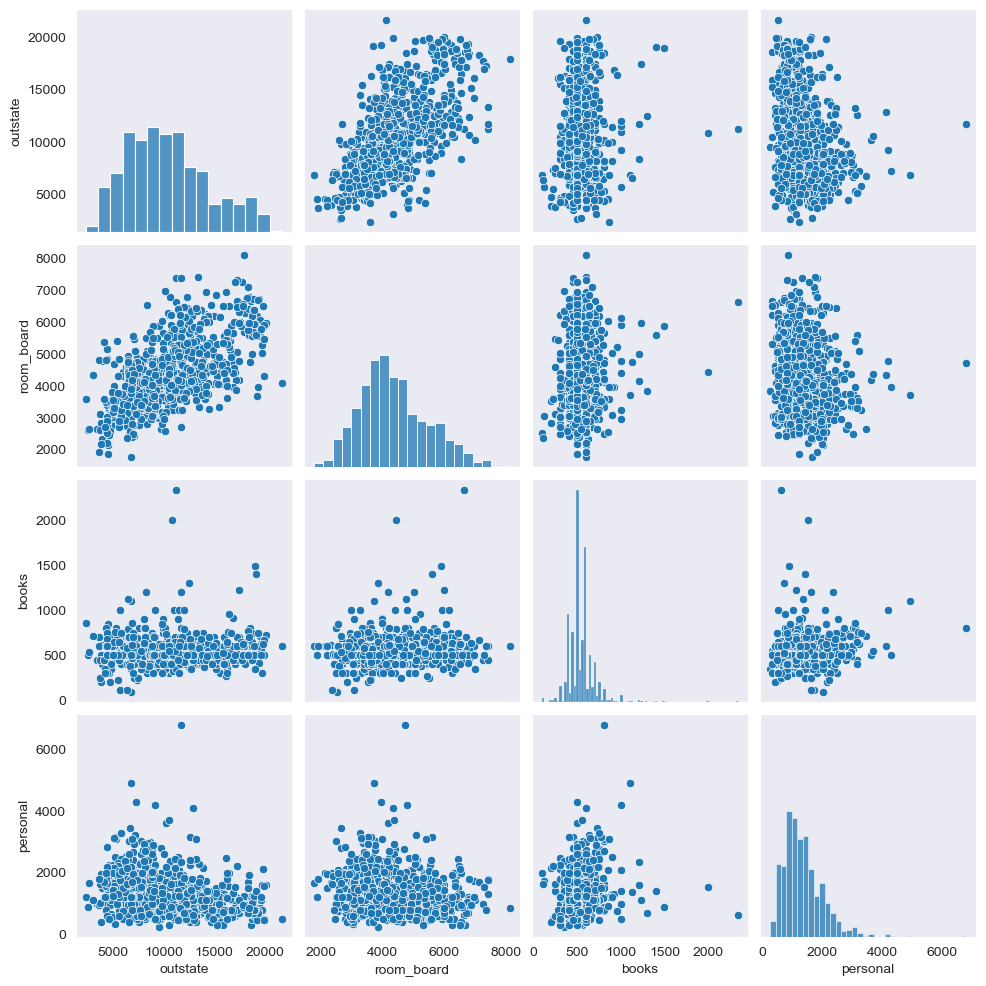

In [37]:
# Plot a pair plot before clustering
sns.pairplot(X_cost);

No clear clusters can be found. Here we will use KMeans to find the cost clusters.

In [38]:
# Feature scaling
sc_cost = StandardScaler()
X_cost_scale = pd.DataFrame(sc_cost.fit_transform(X_cost), columns=X_cost.columns)

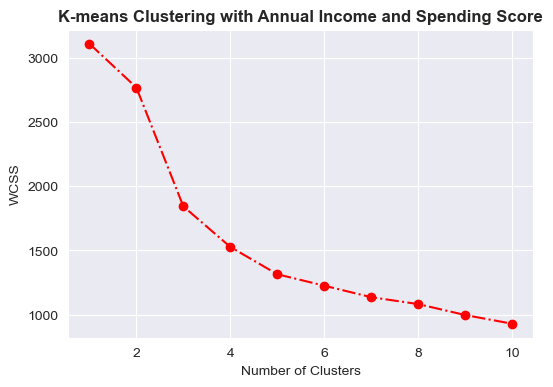

In [39]:
# Find the optimal number of k by using the elbow method (within-cluster sum of square)
wcss = []
for k in range(1, 11):
    kmeans2 = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans2.fit(X_cost_scale)
    wcss.append(kmeans2.inertia_)

sns.set_style('darkgrid')
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering with Annual Income and Spending Score', fontweight='bold')
plt.show()

The within-cluster sum of square value drop sharply before k=3, therefore the optimal number of clusters is 3.

In [40]:
# Create and fit the k-means clustering model
kmeans2 = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans2.fit(X_cost_scale)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [41]:
# Find the average values for each cluster
model_labels = kmeans2.labels_
label_name = 'cost_label'
feature_names = list(X_cost_scale.columns)

df[label_name] = model_labels
cost_cls = df[feature_names + [label_name]].groupby(label_name).mean().reset_index()

cost_cls

,cost_label,outstate,room_board,books,personal
0,0,7705.516279,3679.983721,533.300000,1537.920930
1,1,11571.347826,4675.695652,1157.521739,1895.652174
2,2,13990.391975,5234.148148,527.552469,1039.422840


In [42]:
# Assign the cluster names
label_to_cls = {
    0: 'Low',
    1: 'High',
    2: 'Average',
}

# Rename the labels
cost_cls['cost_label'] = cost_cls['cost_label'].map(label_to_cls)
df['cost_label'] = df['cost_label'].map(label_to_cls)

cost_cls

,cost_label,outstate,room_board,books,personal
0,Low,7705.516279,3679.983721,533.300000,1537.920930
1,High,11571.347826,4675.695652,1157.521739,1895.652174
2,Average,13990.391975,5234.148148,527.552469,1039.422840


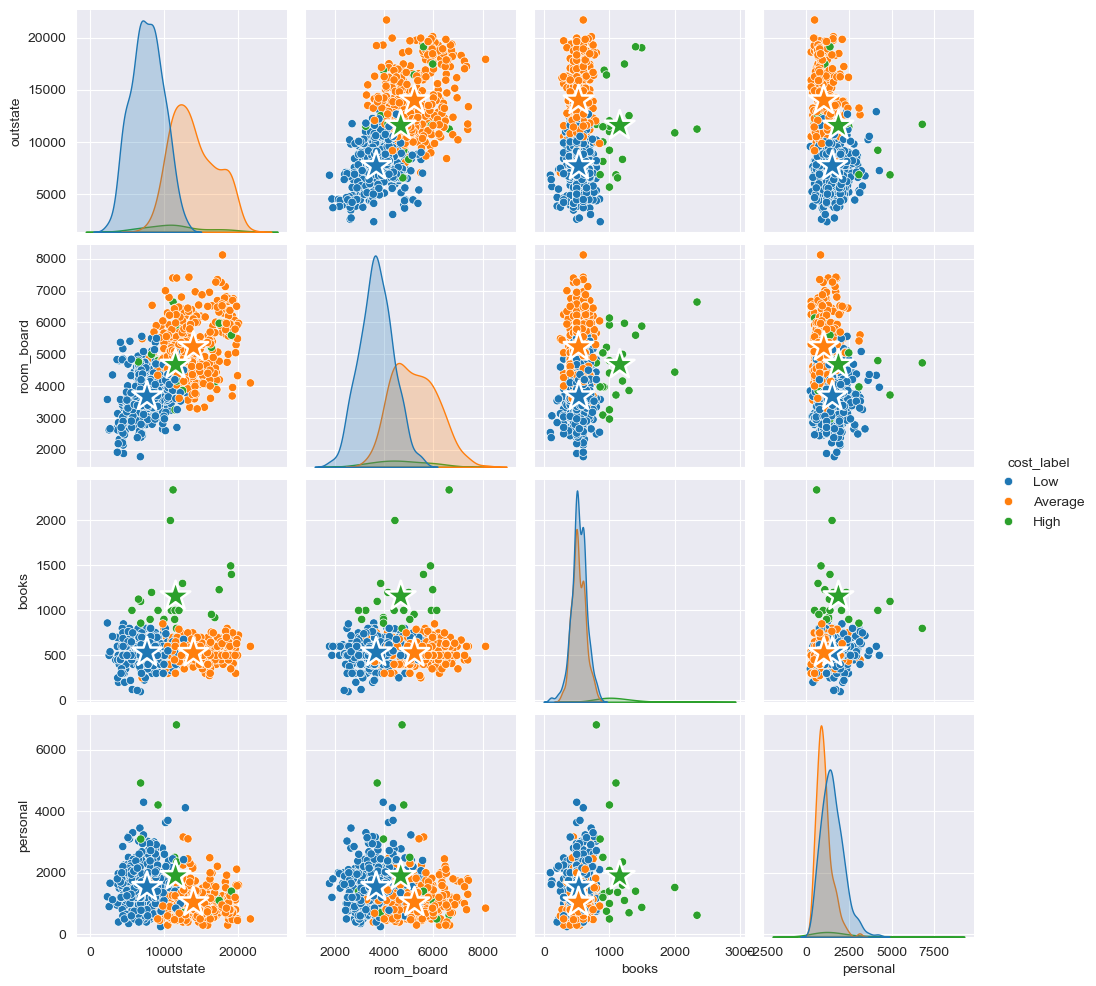

In [43]:
# Plot the pair plot after clustering
pairgrid = sns.pairplot(df[cost_features + ['cost_label']], hue='cost_label')

pairgrid.data = cost_cls
pairgrid.map_offdiag(func=sns.scatterplot, s=500, marker='*', palette='flag');

The `Average` and `Low` cost clusters can be clearly divided by using the four cost features while the `High` cost cluster can be only identified by the book cost.

[Back to Contents](#back)

## 6. Conclusion <a id='conclusion'></a>

This project divide the US universities/colleges into different clusters based on the following criteria:

1. Popularity: Three clusters (High, Average, Low). The high popularity school are those with high enroll ratios. For the remaining, the universities/college with lower accept ratio is classified as average popularity while the rest are the least popular.
2. Quality: Five clusters (Best, Good, Above Average, Average, Below Average). The `expend` (`investment on students`) is the primary factor to divide the universities/colleges into different quality clusters.
3. Cost: Three clusters (High, Average, Low). The `Average` and `Low` cost clusters can be clearly divided by using the four cost features while the `High` cost cluster can be only identified by the book cost.

[Back to Contents](#back)